In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
cust_df = pd.read_excel('./Dataset/p1-customers.xlsx')
cust_df.sample(10)

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
337,Rosemarie Younger,Store Mailing List,927,5674 Kipling Pkwy,Arvada,CO,80002,204.58,109,No,1,1
1894,Ivonne Anzures,Credit Card Only,120,46093 Black Spruce Ln,Parker,CO,80138,567.03,102,No,5,2
1133,Katie Bundschu,Loyalty Club and Credit Card,380,9201 E Mississippi Ave,Denver,CO,80247,995.97,105,No,6,8
1354,Margo Traywick,Loyalty Club Only,291,1801 S Quay St,Lakewood,CO,80232,397.71,106,No,5,2
48,Diane Schweigerdt,Store Mailing List,137,5490 S Jasper Way,Centennial,CO,80015,126.72,104,No,1,8
1560,Kaleum Sayasavanh,Loyalty Club Only,1439,4326 W Center Ave,Denver,CO,80219,296.76,106,No,2,3
944,Tracy Acosta,Store Mailing List,2804,10063 W 81st Ln,Arvada,CO,80005,6.50,103,No,1,8
834,April Hammond,Store Mailing List,2488,1909 S Quebec Way,Denver,CO,80231,213.86,100,No,2,7
395,Alexis Aranda,Store Mailing List,1058,1282 S Troy St,Aurora,CO,80012,43.61,105,No,1,4
992,Galina Kotlyar,Store Mailing List,2944,6885 E Briarwood Dr,Centennial,CO,80112,181.94,101,No,1,5


In [4]:
cust_df.State.value_counts()

CO    2375
Name: State, dtype: int64

In [5]:
# check to see if there are some customers that buys a lot 
cust_df.Name.value_counts().head(15)

Jane Nelson         2
Rebecca Jones       2
Linda Smith         2
Jennifer Davis      2
Jessie Ives         2
Kelly Carlson       2
Lynn Pacheco        2
Maria Gonzalez      2
Elizabeth Harris    2
Blasa Ruiz          1
Marcella Dressel    1
Debra Parker        1
Ramona Twiss        1
Kyung Yun           1
Katy Page           1
Name: Name, dtype: int64

In [6]:
# Chech to see if there is duplicated value in the dataset
assert cust_df.duplicated().sum() == 0

In [7]:
# Check to see if there is any null value in any of the rows
assert cust_df.isnull().any(axis=1).sum() == 0

In [8]:
# Check to see the individual values in the customer segement
cust_df.Customer_Segment.value_counts()

Store Mailing List              1108
Loyalty Club Only                579
Credit Card Only                 494
Loyalty Club and Credit Card     194
Name: Customer_Segment, dtype: int64

The Customer_Segment should be a categorical type

In [9]:
# check the number of cities present
print(cust_df.City.value_counts())
len(cust_df.City.value_counts())

Denver               750
Aurora               493
Arvada               247
Lakewood             217
Broomfield           125
Westminster           85
Centennial            78
Littleton             72
Englewood             56
Wheat Ridge           54
Thornton              35
Parker                27
Northglenn            24
Highlands Ranch       23
Golden                19
Greenwood Village     14
Edgewater             12
Commerce City         10
Superior               9
Morrison               7
Lafayette              5
Louisville             4
Boulder                3
Brighton               2
Castle Pines           2
Lone Tree              1
Henderson              1
Name: City, dtype: int64


27

In [10]:
#  whether there are omre than one state represented in the dataset 
cust_df.State.value_counts()

CO    2375
Name: State, dtype: int64

The state variable can be removed, since all the data are from just one state 

In [11]:
#checking the number of zip codes that exist in the dataset
cust_df.ZIP.value_counts().head(10)

80013    127
80219     93
80015     90
80012     88
80020     87
80004     80
80226     71
80014     71
80005     71
80247     57
Name: ZIP, dtype: int64

There are 86 zipcodes in the dataset

In [12]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Name                        2375 non-null   object 
 1   Customer_Segment            2375 non-null   object 
 2   Customer_ID                 2375 non-null   int64  
 3   Address                     2375 non-null   object 
 4   City                        2375 non-null   object 
 5   State                       2375 non-null   object 
 6   ZIP                         2375 non-null   int64  
 7   Avg_Sale_Amount             2375 non-null   float64
 8   Store_Number                2375 non-null   int64  
 9   Responded_to_Last_Catalog   2375 non-null   object 
 10  Avg_Num_Products_Purchased  2375 non-null   int64  
 11  #_Years_as_Customer         2375 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 222.8+ KB


In [13]:
print(cust_df.Store_Number.value_counts(sort=False))
len(cust_df.Store_Number.value_counts(sort=False))

100    326
102     85
104    270
106    283
108    210
101    276
103    225
105    305
107    226
109    169
Name: Store_Number, dtype: int64


10

There are 10 stores in the data

In [14]:
cust_df.Responded_to_Last_Catalog.value_counts()

No     2204
Yes     171
Name: Responded_to_Last_Catalog, dtype: int64

Most of the time, there is no response to last clatalog

In [15]:
cust_df.Avg_Num_Products_Purchased.value_counts()

1     858
2     289
3     277
4     240
5     235
6     216
7     164
8      36
11     10
10      9
12      8
9       7
16      7
17      5
15      3
19      2
21      2
22      2
13      1
20      1
18      1
14      1
26      1
Name: Avg_Num_Products_Purchased, dtype: int64

In [16]:
cust_df = cust_df.rename(columns={'#_Years_as_Customer': 'No_of_Years_as_Customer'})

In [17]:
cust_df.columns

Index(['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'State',
       'ZIP', 'Avg_Sale_Amount', 'Store_Number', 'Responded_to_Last_Catalog',
       'Avg_Num_Products_Purchased', 'No_of_Years_as_Customer'],
      dtype='object')

In [18]:
cust_df.No_of_Years_as_Customer.value_counts()

2    316
8    313
6    307
1    297
5    294
3    285
4    284
7    279
Name: No_of_Years_as_Customer, dtype: int64

## Data Cleaning
#### Cleanliness issues
* The Customer_Segment, Store_Number and Responded_to_Last_Catalog are wrongly saved as object instead of category
#### Tidiness issues 
* The state and zip code are not important for this analysis


#### Define
Change Customer_Segment, Store_Number and Responded_to_Last_Catalog to categorical types

#### Code

In [19]:
col_names = ['Customer_Segment', 'Store_Number', 'Responded_to_Last_Catalog']
for col in col_names:
    cust_df[col] = cust_df[col].astype('category')

#### Test

In [20]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Name                        2375 non-null   object  
 1   Customer_Segment            2375 non-null   category
 2   Customer_ID                 2375 non-null   int64   
 3   Address                     2375 non-null   object  
 4   City                        2375 non-null   object  
 5   State                       2375 non-null   object  
 6   ZIP                         2375 non-null   int64   
 7   Avg_Sale_Amount             2375 non-null   float64 
 8   Store_Number                2375 non-null   category
 9   Responded_to_Last_Catalog   2375 non-null   category
 10  Avg_Num_Products_Purchased  2375 non-null   int64   
 11  No_of_Years_as_Customer     2375 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(4)
memory usage: 174.8+ KB


#### Define
Delete state from dataset

#### Code

In [21]:
cust_df = cust_df.drop(['State'], axis = 1)

#### Test

In [22]:
cust_df.columns

Index(['Name', 'Customer_Segment', 'Customer_ID', 'Address', 'City', 'ZIP',
       'Avg_Sale_Amount', 'Store_Number', 'Responded_to_Last_Catalog',
       'Avg_Num_Products_Purchased', 'No_of_Years_as_Customer'],
      dtype='object')

In [22]:
cust_df.sample(10)

,Name,Customer_Segment,Customer_ID,Address,City,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,No_of_Years_as_Customer
1614,Lazara Soto,Loyalty Club Only,1772,11809 E Harvard Ave,Aurora,462.53,104,No,5,3
1499,Jeanette Bustos,Loyalty Club Only,1135,1473 S Otis St,Lakewood,392.29,106,No,1,2
1503,Chantel Corkle,Loyalty Club Only,1145,1795 S Dawson Way,Aurora,296.96,104,No,3,2
1384,Margaret Baumann,Loyalty Club Only,482,1041 Cottonwood St,Broomfield,359.45,108,No,2,5
186,Veronica Decena,Store Mailing List,511,11191 W 17th Ave,Lakewood,243.03,108,Yes,1,3
1131,Jessie Ives,Loyalty Club and Credit Card,351,11973 E Ford Dr,Aurora,1124.95,105,No,7,5
1781,Ann Spera,Loyalty Club Only,2773,1470 S Quebec Way,Denver,286.76,100,No,3,5
1482,Val Salazar,Loyalty Club Only,1050,3636 Clay St,Denver,368.32,108,No,1,6
1180,Janet Kamerick,Loyalty Club and Credit Card,1161,9457 Brentwood St,Broomfield,206.64,108,No,2,1
482,Lillian Salazar,Store Mailing List,1325,8051 Parkland St,Broomfield,117.11,109,No,1,2


### Interesting questions
* Which category of customer segment has the highest average sale
* Which of the city has the highest or the lowest average sale


## Univariate exploration

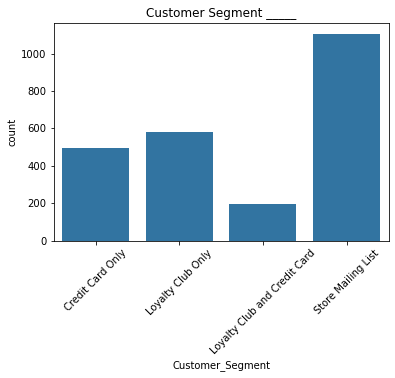

In [23]:
base_color = sns.color_palette()[0]
sns.countplot(data=cust_df, x = 'Customer_Segment', color=base_color);
plt.xticks(rotation=45)
plt.title('Customer Segment _____');

The store mailing list has the highest transaction

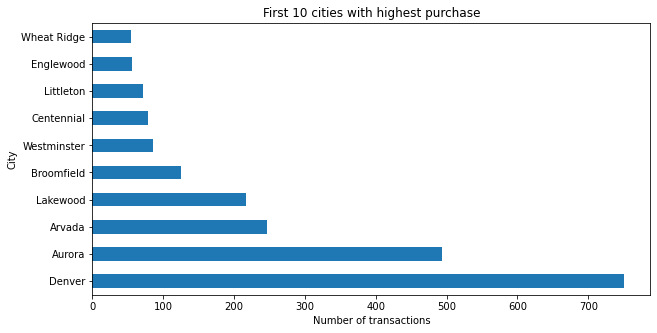

In [24]:
# Viewing the first ten cities with purchase
plt.figure(figsize=(10, 5))
cust_df.City.value_counts().head(10).plot(kind='barh')
plt.title('First 10 cities with highest purchase')
plt.xlabel('Number of transactions')
plt.ylabel('City');

Denver has the highest number of transactions

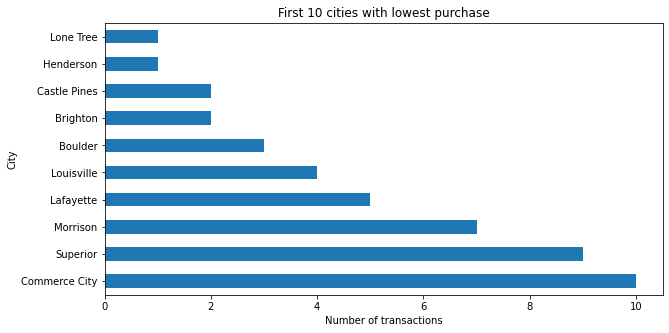

In [25]:
# Viewing the last ten cities with purchase
plt.figure(figsize=(10, 5))
cust_df.City.value_counts().tail(10).plot(kind='barh')
plt.title('First 10 cities with lowest purchase')
plt.xlabel('Number of transactions')
plt.ylabel('City');

Lone tree has the lowest number of transactiona

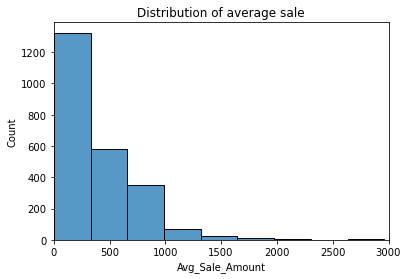

In [26]:
set_bins = np.linspace(cust_df.Avg_Sale_Amount.min(), cust_df.Avg_Sale_Amount.max(), 10)
sns.histplot(data=cust_df, x='Avg_Sale_Amount', bins=set_bins)
plt.title('Distribution of average sale')
plt.xlim(0,3000);

The distribution is right skewed, showing that there is posibility of outlier on the right

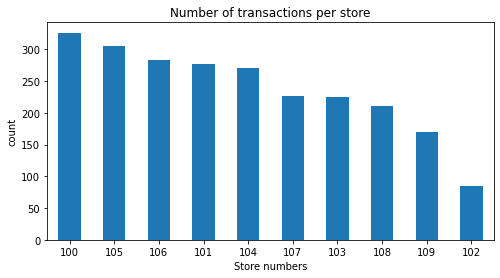

In [27]:
plt.figure(figsize=(8, 4))
cust_df.Store_Number.value_counts().plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.title('Number of transactions per store')
plt.xlabel('Store numbers')
plt.ylabel('count');

The number of transactions per store

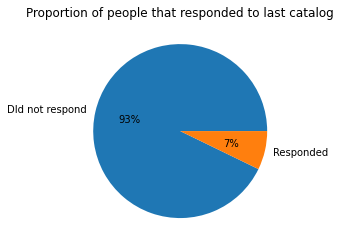

In [28]:
plt.pie(cust_df.Responded_to_Last_Catalog.value_counts(), labels = ['DId not respond', 'Responded '], autopct='%.0f%%' )
plt.title("Proportion of people that responded to last catalog");

There are more people that did not respond to their last catalog than those that attended to it

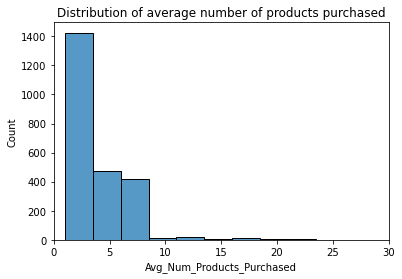

In [29]:
#set_bins = np.linspace(cust_df.Avg_Sale_Amount.min(), cust_df.Avg_Sale_Amount.max(), 10)
sns.histplot(data=cust_df, x='Avg_Num_Products_Purchased', bins = 10)
plt.title('Distribution of average number of products purchased')
plt.xlim(0,30);

Most of the purchase made are between 1 and 8

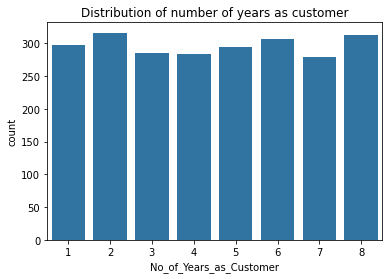

In [30]:
#set_bins = np.arange(1, 9, 1)
sns.countplot(data=cust_df, x='No_of_Years_as_Customer', color=base_color)
plt.title('Distribution of number of years as customer');

The difference in the different years are not so significant

## Bivariate Exploration

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

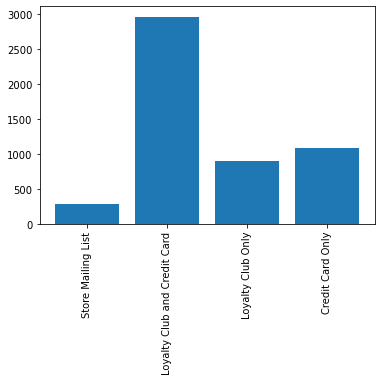

In [57]:
plt.bar('Customer_Segment',  'Avg_Sale_Amount', data = cust_df )
plt.xticks(rotation=90)


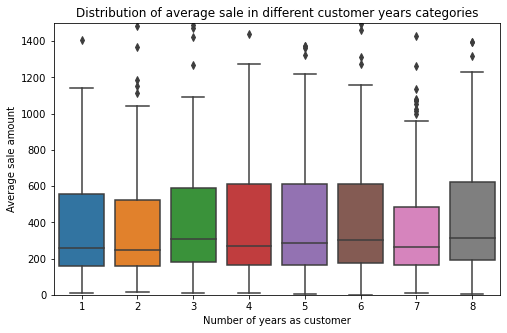

In [89]:

plt.figure(figsize=(8,5))
sns.boxplot(data=cust_df, x='No_of_Years_as_Customer', y='Avg_Sale_Amount')
plt.ylim(0,1500)
plt.xlabel('Number of years as customer')
plt.ylabel('Average sale amount')
plt.title('Distribution of average sale in different customer years categories');

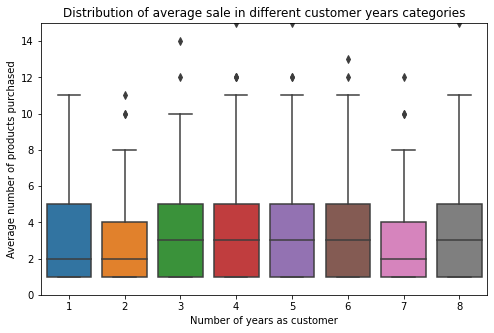

In [71]:
plt.figure(figsize=(8,5))
sns.boxplot(data=cust_df, x='No_of_Years_as_Customer', y='Avg_Num_Products_Purchased')
plt.ylim(0,15)
plt.xlabel('Number of years as customer')
plt.ylabel('Average number of products purchased')
plt.title('Distribution of average sale in different customer years categories');

* Cutomers that have spent 3, 4, 4, 6, and 8 years have similar inter quartile range 
* Customers within the range of 1, 2, and 7 years have the lowest minimum number of purchase

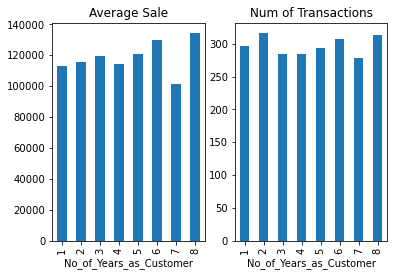

In [82]:
plt.subplot(1, 2, 1)
cust_df.groupby('No_of_Years_as_Customer').sum()['Avg_Sale_Amount'].plot(kind='bar')
plt.xticks(rotation = 90)
plt.title('Average Sale');

plt.subplot(1, 2, 2)
cust_df.groupby('No_of_Years_as_Customer').count()['Avg_Sale_Amount'].plot(kind='bar')
plt.xticks(rotation = 90)
plt.title('Num of Transactions');

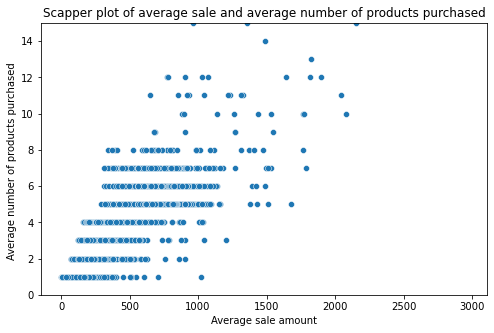

In [80]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=cust_df, x='Avg_Sale_Amount', y='Avg_Num_Products_Purchased')
plt.ylim(0,15)
plt.xlabel('Average sale amount')
plt.ylabel('Average number of products purchased ')
plt.title('Scapper plot of average sale and average number of products purchased');

* Average sale amount increses with average umber of products purchased. 
* This looks intuitive enough

Although there are more people in the store mailing list, the loyalty club has more purchasing power than the store mailing list

In [43]:
cust_df.groupby('Customer_Segment').count()['Avg_Sale_Amount']


Customer_Segment
Credit Card Only                 494
Loyalty Club Only                579
Loyalty Club and Credit Card     194
Store Mailing List              1108
Name: Avg_Sale_Amount, dtype: int64

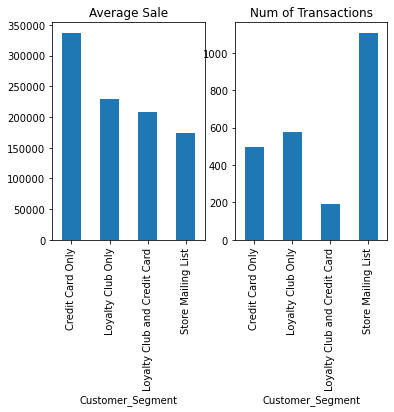

In [81]:
plt.subplot(1, 2, 1)
cust_df.groupby('Customer_Segment').sum()['Avg_Sale_Amount'].plot(kind='bar')
plt.xticks(rotation = 90)
plt.title('Average Sale');

plt.subplot(1, 2, 2)
cust_df.groupby('Customer_Segment').count()['Avg_Sale_Amount'].plot(kind='bar')
plt.xticks(rotation = 90)
plt.title('Num of Transactions');

* People with credit card pay more but they don't have the highest number of transactions
* Although the customers on the store mailing list have the highest number of transactions, it does not translate to average sale

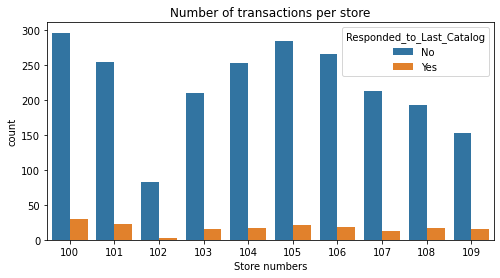

In [94]:
plt.figure(figsize=(8, 4))
sns.countplot(data=cust_df, x= 'Store_Number', hue='Responded_to_Last_Catalog')
plt.xticks(rotation = 0)
plt.title('Number of transactions per store')
plt.xlabel('Store numbers')
plt.ylabel('count');

* As expected the number of customers that attended to last catalog is lower that those that did not in all stores

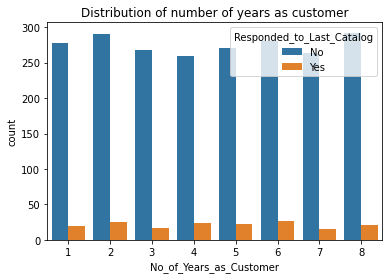

In [96]:
#set_bins = np.arange(1, 9, 1)
sns.countplot(data=cust_df, x='No_of_Years_as_Customer', hue='Responded_to_Last_Catalog')
plt.title('Distribution of number of years as customer');

* As expected the number of customers that attended to last catalog is lower that those that did not among different number of years among customers